# Football Transfer Market Analysis

This project is intended to analyse the European football transfer market from the year 2022 and create a summary of the market activity.

Data source: https://www.kaggle.com/code/brunopincet/football-summer-market-analysis/input

## 1. Load Packages and Dataset

### Packages are taken from the project dataset link reference

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
## Change the path and filename depending on where you save the data file and renaming the file

df = pd.read_csv('/content/drive/MyDrive/PROA Final Project/Summer22_FootballTransfers.csv')

In [3]:
## Data summary
df.info()
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33825 entries, 0 to 33824
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 33825 non-null  object 
 1   position             33824 non-null  object 
 2   age                  33674 non-null  float64
 3   origin_club          33825 non-null  object 
 4   league_origin_club   32903 non-null  object 
 5   country_origin_club  32903 non-null  object 
 6   new_club             33825 non-null  object 
 7   league_new_club      28351 non-null  object 
 8   country_new_club     28351 non-null  object 
 9   player_valuje        33825 non-null  object 
 10  cost                 33825 non-null  object 
 11  date_of_transfer     33825 non-null  object 
dtypes: float64(1), object(11)
memory usage: 3.1+ MB
(33825, 12)


In [4]:
df.head()

,name,position,age,origin_club,league_origin_club,country_origin_club,new_club,league_new_club,country_new_club,player_valuje,cost,date_of_transfer
0,Amine Gouiri,Centre-Forward,22.0,OGC Nice,Ligue 1,France,Stade Rennais FC,Ligue 1,France,€42.00m,€28.00m,2022-09-01
1,Umar Sadiq,Centre-Forward,25.0,UD Almería,LaLiga,Spain,Real Sociedad,LaLiga,Spain,€18.00m,€20.00m,2022-09-01
2,Carlos Soler,Central Midfield,25.0,Valencia CF,LaLiga,Spain,Paris Saint-Germain,Ligue 1,France,€50.00m,€18.00m,2022-09-01
3,Manuel Akanji,Centre-Back,27.0,Borussia Dortmund,Bundesliga,Germany,Manchester City,Premier League,England,€30.00m,€17.50m,2022-09-01
4,Wout Faes,Centre-Back,24.0,Stade Reims,Ligue 1,France,Leicester City,Premier League,England,€10.00m,€17.00m,2022-09-01


## 2. Data Cleansing

In [5]:
df['cost'].unique()

array(['€28.00m', '€20.00m', '€18.00m', '€17.50m', '€17.00m', '€15.00m',
       '€12.00m', '€11.00m', '€10.40m', '€10.00m', '€9.00m', '€7.00m',
       '€6.00m', '€5.50m', '€5.00m', 'Loan fee:€4.50m', '€4.50m',
       '€4.40m', '€4.10m', '€4.00m', 'Loan fee:€3.00m', '€3.00m',
       '€2.60m', 'Loan fee:€2.50m', 'Loan fee:€2.31m', '€2.30m',
       'Loan fee:€2.00m', '€2.00m', '€1.90m', 'Loan fee:€1.50m', '€1.50m',
       '€1.04m', '€1.00m', 'Loan fee:€1.00m', '€958Th.', '€900Th.',
       '€700Th.', 'Loan fee:€600Th.', '€600Th.', '€580Th.', '€500Th.',
       'Loan fee:€500Th.', '€390Th.', '€350Th.', '€300Th.',
       'Loan fee:€300Th.', '€200Th.', '€156Th.', '€150Th.', '€114Th.',
       'Loan fee:€100Th.', '€55Th.', '€35Th.', 'Loan fee:€20Th.',
       'free transfer', 'loan transfer', '?', '-', '€80.40m',
       'Loan fee:€4.00m', '€2.62m', '€2.50m', '€1.80m', '€1.20m',
       '€490Th.', '€450Th.', 'Loan fee:€400Th.', '€250Th.', '€60Th.',
       'Loan fee:€25Th.', '€5Th.', '€95.00m', '€50

There are unique data types in the 'cost' column, such as those containing 'Loan fee:' and 'draft'. These activities do not potray the purchase of a player by a club. Thus, these data types can not be included.

In [6]:
## Cost
df=df[df["cost"].str.contains("Loan fee")==False]
df=df[df["cost"].str.contains("-")==False]
df=df[df["cost"].str.contains("\?")==False]
df=df[df["cost"].str.contains("loan transfer")==False]
df=df[df["cost"].str.contains("draft")==False]

df["cost"]=df["cost"].str.replace("free transfer","0")
df["cost"]=df["cost"].str.replace("Th.","000")
df["cost"]=df["cost"].str.replace("m","0000")
df["cost"]=df["cost"].str.replace(".","")
df["cost"]=df["cost"].str.replace("€","")

df["cost"]=df["cost"].astype(int)

## Player Value
df=df[df["player_valuje"].str.contains("Loan fee")==False]
df=df[df["player_valuje"].str.contains("-")==False]
df=df[df["player_valuje"].str.contains("\?")==False]
df=df[df["player_valuje"].str.contains("loan transfer")==False]
df=df[df["player_valuje"].str.contains("draft")==False]

df["player_valuje"]=df["player_valuje"].str.replace("free transfer","0")
df["player_valuje"]=df["player_valuje"].str.replace("Th.","000")
df["player_valuje"]=df["player_valuje"].str.replace("m","0000")
df["player_valuje"]=df["player_valuje"].str.replace(".","")
df["player_valuje"]=df["player_valuje"].str.replace("€","")

df["player_valuje"]=df["player_valuje"].astype(int)

## Rename column
df = df.rename(columns = {'player_valuje':'player_market_value'})

<ipython-input-6-ef9ee5adbb8d>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  df["cost"]=df["cost"].str.replace("Th.","000")
<ipython-input-6-ef9ee5adbb8d>:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["cost"]=df["cost"].str.replace(".","")
<ipython-input-6-ef9ee5adbb8d>:24: FutureWarning: The default value of regex will change from True to False in a future version.
  df["player_valuje"]=df["player_valuje"].str.replace("Th.","000")
<ipython-input-6-ef9ee5adbb8d>:26: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["player_valuje"]=df["player_valuje"].str.replace(".","")


In [7]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19139 entries, 0 to 26356
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 19139 non-null  object 
 1   position             19138 non-null  object 
 2   age                  19067 non-null  float64
 3   origin_club          19139 non-null  object 
 4   league_origin_club   18989 non-null  object 
 5   country_origin_club  18989 non-null  object 
 6   new_club             19139 non-null  object 
 7   league_new_club      18971 non-null  object 
 8   country_new_club     18971 non-null  object 
 9   player_market_value  19139 non-null  int64  
 10  cost                 19139 non-null  int64  
 11  date_of_transfer     19139 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 1.9+ MB


,name,position,age,origin_club,league_origin_club,country_origin_club,new_club,league_new_club,country_new_club,player_market_value,cost,date_of_transfer
0,Amine Gouiri,Centre-Forward,22.0,OGC Nice,Ligue 1,France,Stade Rennais FC,Ligue 1,France,42000000,28000000,2022-09-01
1,Umar Sadiq,Centre-Forward,25.0,UD Almería,LaLiga,Spain,Real Sociedad,LaLiga,Spain,18000000,20000000,2022-09-01
2,Carlos Soler,Central Midfield,25.0,Valencia CF,LaLiga,Spain,Paris Saint-Germain,Ligue 1,France,50000000,18000000,2022-09-01
3,Manuel Akanji,Centre-Back,27.0,Borussia Dortmund,Bundesliga,Germany,Manchester City,Premier League,England,30000000,17500000,2022-09-01
4,Wout Faes,Centre-Back,24.0,Stade Reims,Ligue 1,France,Leicester City,Premier League,England,10000000,17000000,2022-09-01


In [8]:
coord=pd.read_html("https://developers.google.com/public-data/docs/canonical/countries_csv")[0]
new_count = [{'country': 'EN', 'latitude': 52.3555177, 'longitude': -1.1743197,'name':'England'},
             {'country': 'W', 'latitude': 53.3406, 'longitude': -1.2816,'name':'Wales'},
             {'country': 'H', 'latitude': 22.396428, 'longitude': 114.109497,'name':'Hongkong'},
             {'country': 'BH', 'latitude': 43.856430, 'longitude': 18.413029,'name':'Bosnia-Herzegovina'},
             {'country': 'NM', 'latitude': 41.6086, 'longitude': 41.6086,'name':'North Macedonia'},
             {'country': 'NI', 'latitude': 54.607868, 'longitude': -5.926437,'name':'Northern Ireland'},
             {'country': 'PA', 'latitude': 31.952162, 'longitude': 35.233154,'name':'Palästina'},
             {'country': 'CI', 'latitude': 7.539989, 'longitude': -5.547080,'name':"Cote d'Ivoire"},
             {'country': 'TG', 'latitude': 13.598878, 'longitude': -14.947733,'name':'The Gambia'},
             {'country': 'CT', 'latitude': 25.105497, 'longitude': 121.597366,'name':'Chinese Taipei'},
             {'country': 'MY', 'latitude': 16.871311, 'longitude': 96.199379,'name':'Myanmar'},
             {'country': 'CO', 'latitude': -4.322447, 'longitude': 15.307045,'name':'Congo'},
             {'country': 'ES', 'latitude': -26.522503, 'longitude': 31.465866,'name':'Eswatini'},
             {'country': 'NK', 'latitude': -22.275801, 'longitude': 166.457993,'name':'Neukaledonien'},
             {'country': 'CT', 'latitude': 23.697810, 'longitude': 120.960515,'name':'Chinese Taipei (Taiwan)'},
             {'country': 'SC', 'latitude': 56.0000, 'longitude': -4,'name':'Scotland'},
             {'country': 'DRC', 'latitude':-4.322447, 'longitude': 15.307045,'name':'DR Congo'},
             {'country': 'BO', 'latitude': -24.653257, 'longitude': 25.906792,'name':'Botsuana'},
             {'country': 'KS', 'latitude': 35.9078, 'longitude': 127.7669,'name':'Korea, South'}]

coord = pd.concat([coord,pd.DataFrame(new_count)])
coord_from=coord.rename(columns={"name": "from", "longitude": "longitude_from","latitude":"latitude_from"}).drop(['country'], axis=1)
coord_to=coord.rename(columns={"name": "to", "longitude": "longitude_to","latitude":"latitude_to"}).drop(['country'], axis=1)

In [9]:
df=df.merge(coord_to, left_on='country_new_club',right_on='to', how='left')
df=df.merge(coord_from, left_on='country_origin_club',right_on='from', how='left')
df['week_of_transfer'] = pd.to_datetime(df['date_of_transfer']).dt.week

<ipython-input-9-17a25b8393c4>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week_of_transfer'] = pd.to_datetime(df['date_of_transfer']).dt.week


In [10]:
## Backup data
df.to_csv('transfer_market_raw_data.csv',index=False)

In [11]:
## Check Data after Longitude & Lattitude Merge
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19139 entries, 0 to 19138
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 19139 non-null  object 
 1   position             19138 non-null  object 
 2   age                  19067 non-null  float64
 3   origin_club          19139 non-null  object 
 4   league_origin_club   18989 non-null  object 
 5   country_origin_club  18989 non-null  object 
 6   new_club             19139 non-null  object 
 7   league_new_club      18971 non-null  object 
 8   country_new_club     18971 non-null  object 
 9   player_market_value  19139 non-null  int64  
 10  cost                 19139 non-null  int64  
 11  date_of_transfer     19139 non-null  object 
 12  latitude_to          18971 non-null  float64
 13  longitude_to         18971 non-null  float64
 14  to                   18971 non-null  object 
 15  latitude_from        18989 non-null 

,name,position,age,origin_club,league_origin_club,country_origin_club,new_club,league_new_club,country_new_club,player_market_value,cost,date_of_transfer,latitude_to,longitude_to,to,latitude_from,longitude_from,from,week_of_transfer
0,Amine Gouiri,Centre-Forward,22.0,OGC Nice,Ligue 1,France,Stade Rennais FC,Ligue 1,France,42000000,28000000,2022-09-01,46.227638,2.213749,France,46.227638,2.213749,France,35
1,Umar Sadiq,Centre-Forward,25.0,UD Almería,LaLiga,Spain,Real Sociedad,LaLiga,Spain,18000000,20000000,2022-09-01,40.463667,-3.749220,Spain,40.463667,-3.749220,Spain,35
2,Carlos Soler,Central Midfield,25.0,Valencia CF,LaLiga,Spain,Paris Saint-Germain,Ligue 1,France,50000000,18000000,2022-09-01,46.227638,2.213749,France,40.463667,-3.749220,Spain,35
3,Manuel Akanji,Centre-Back,27.0,Borussia Dortmund,Bundesliga,Germany,Manchester City,Premier League,England,30000000,17500000,2022-09-01,52.355518,-1.174320,England,51.165691,10.451526,Germany,35
4,Wout Faes,Centre-Back,24.0,Stade Reims,Ligue 1,France,Leicester City,Premier League,England,10000000,17000000,2022-09-01,52.355518,-1.174320,England,46.227638,2.213749,France,35


## 3. Data Exploration & Analysis

In [12]:
df.groupby(['country_origin_club']).agg({'name':'count'}).sort_values(by='name',ascending=False).head(20)

,name
country_origin_club,
Italy,2895
Spain,1795
Germany,1145
Russia,828
France,575
Serbia,540
Romania,528
Turkey,523
England,519


In [13]:
pd.to_datetime(df['date_of_transfer'].unique())

DatetimeIndex(['2022-09-01', '2022-08-31', '2022-08-30', '2022-08-29',
               '2022-08-28', '2022-08-27', '2022-08-26', '2022-08-25',
               '2022-08-24', '2022-08-23', '2022-08-22', '2022-08-21',
               '2022-08-20', '2022-08-19', '2022-08-18', '2022-08-17',
               '2022-08-16', '2022-08-15', '2022-08-14', '2022-08-13',
               '2022-08-12', '2022-08-11', '2022-08-10', '2022-08-09',
               '2022-08-08', '2022-08-07', '2022-08-06', '2022-08-05',
               '2022-08-04', '2022-08-03', '2022-08-02', '2022-08-01',
               '2022-07-31', '2022-07-30', '2022-07-29', '2022-07-28',
               '2022-07-27', '2022-07-26', '2022-07-25', '2022-07-24',
               '2022-07-23', '2022-07-22', '2022-07-21', '2022-07-20',
               '2022-07-19', '2022-07-18', '2022-07-17', '2022-07-16',
               '2022-07-15', '2022-07-14', '2022-07-13', '2022-07-12',
               '2022-07-11', '2022-07-10', '2022-07-09', '2022-07-08',
      

### 3.1 Top 10 Most Exspensive Transfers & Most Valueable Players of Summer 2022 Transfer Window

In [17]:
list(df.columns)

['name',
 'position',
 'age',
 'origin_club',
 'league_origin_club',
 'country_origin_club',
 'new_club',
 'league_new_club',
 'country_new_club',
 'player_market_value',
 'cost',
 'date_of_transfer',
 'latitude_to',
 'longitude_to',
 'to',
 'latitude_from',
 'longitude_from',
 'from',
 'week_of_transfer']

In [24]:
df[['name','age','position','origin_club','new_club','cost']].sort_values(by='cost',ascending= False).head(10)

,name,age,position,origin_club,new_club,cost
502,Antony,22.0,Right Winger,Ajax Amsterdam,Manchester United,95000000
274,Wesley Fofana,21.0,Centre-Back,Leicester City,Chelsea FC,80400000
12364,Aurélien Tchouameni,22.0,Defensive Midfield,AS Monaco,Real Madrid,80000000
12365,Darwin Núñez,23.0,Centre-Forward,SL Benfica,Liverpool FC,75000000
1496,Casemiro,30.0,Defensive Midfield,Real Madrid,Manchester United,70650000
899,Alexander Isak,22.0,Centre-Forward,Real Sociedad,Newcastle United,70000000
7871,Matthijs de Ligt,22.0,Centre-Back,Juventus FC,Bayern Munich,67000000
3792,Marc Cucurella,24.0,Left-Back,Brighton & Hove Albion,Chelsea FC,65300000
12366,Erling Haaland,21.0,Centre-Forward,Borussia Dortmund,Manchester City,60000000
12367,Richarlison,25.0,Centre-Forward,Everton FC,Tottenham Hotspur,58000000


In [18]:
# Top 10 Most Expensive Transfers & Most Valueable Players
top_transfers = df[['name','position','age','cost']].sort_values(by='cost', ascending = False).reset_index().head(10)
# top_value = df.sort_values(by='player_market_value', ascending = False).reset_index().head(10)

In [25]:
top_transfers['Transfer Cost'] = ['€ {:,.2f}'.format(i) for i in list(top_transfers['cost'])]
res1 = top_transfers[['name','Transfer Cost']].rename(columns={'name':'Player Name'})
res1.index += 1
res1

,Player Name,Transfer Cost
1,Antony,"€ 95,000,000.00"
2,Wesley Fofana,"€ 80,400,000.00"
3,Aurélien Tchouameni,"€ 80,000,000.00"
4,Darwin Núñez,"€ 75,000,000.00"
5,Casemiro,"€ 70,650,000.00"
6,Alexander Isak,"€ 70,000,000.00"
7,Matthijs de Ligt,"€ 67,000,000.00"
8,Marc Cucurella,"€ 65,300,000.00"
9,Erling Haaland,"€ 60,000,000.00"
10,Richarlison,"€ 58,000,000.00"


AttributeError: ignored

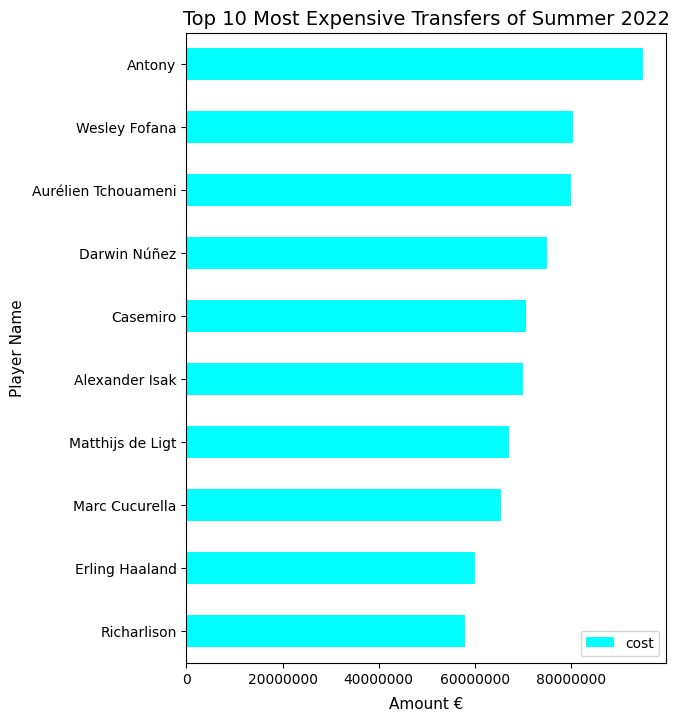

In [26]:
## Plot Top 10
fig, axis = plt.subplots(figsize = (6,7))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1,
                    wspace=0.4,
                    hspace=0.8)

top_transfers.plot.barh(x = 'name', y = 'cost', color = 'cyan', ax = axis)
# top_value.plot.barh(x = 'name', y = 'player_market_value', color = 'r', ax = axis[1])

axis.set_title('Top 10 Most Expensive Transfers of Summer 2022', fontsize = 14)
axis.set_ylabel('Player Name',fontsize = 11, labelpad = 5)
axis.set_xlabel('Amount €',fontsize = 11, labelpad = 7)
axis.invert_yaxis()

# for i in range(len(top_transfers['cost'])):
#         plt.text(i, top_transfers['name'][i]//2, top_transfers['cost'][i], ha = 'center')

axis.ticklabel_format(useOffset=False, style='plain')
plt.savefig("top_10_transfers.png")
plt.show()

### 3.2 Visualizing Transfer Activity per Country & League

In [ ]:
df.info()

In [31]:
### Top 10 Leagues for Money Spent in Transfer Market by Composition

top10_spent = df[df['cost'] != 0].groupby(['league_new_club','country_new_club']).agg({'cost':'sum'}).sort_values(by='cost',ascending=False).head(5)
top10_spent = top10_spent.reset_index()
top10_spent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   league_new_club   5 non-null      object
 1   country_new_club  5 non-null      object
 2   cost              5 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 248.0+ bytes


In [32]:
top10_spent

,league_new_club,country_new_club,cost
0,Premier League,England,2219460000
1,Serie A,Italy,705830000
2,Ligue 1,France,510800000
3,LaLiga,Spain,502690000
4,Bundesliga,Germany,479830000


In [29]:
## Most Expensive Player Transfer per Top 5 League with the Most Money Spent

lst = df[df['league_new_club'].isin(list(top10_spent['league_new_club']))].sort_values(by=['league_new_club','cost'], ascending = [False, False])
lst.head(10)

,name,position,age,origin_club,league_origin_club,country_origin_club,new_club,league_new_club,country_new_club,player_market_value,cost,date_of_transfer,latitude_to,longitude_to,to,latitude_from,longitude_from,from,week_of_transfer
7560,Bremer,Centre-Back,25.0,Torino FC,Serie A,Italy,Juventus FC,Serie A,Italy,35000000,41000000,2022-07-20,41.87194,12.56738,Italy,41.871940,12.567380,Italy,29
12369,Federico Chiesa,Right Winger,24.0,ACF Fiorentina,Serie A,Italy,Juventus FC,Serie A,Italy,65000000,40000000,2022-07-01,41.87194,12.56738,Italy,41.871940,12.567380,Italy,26
4474,Charles De Ketelaere,Attacking Midfield,21.0,Club Brugge KV,Jupiler Pro League,Belgium,AC Milan,Serie A,Italy,30000000,32000000,2022-08-02,41.87194,12.56738,Italy,50.503887,4.469936,Belgium,31
12379,Joaquín Correa,Second Striker,27.0,SS Lazio,Serie A,Italy,Inter Milan,Serie A,Italy,23000000,23600000,2022-07-01,41.87194,12.56738,Italy,41.871940,12.567380,Italy,26
12380,Jérémie Boga,Left Winger,25.0,US Sassuolo,Serie A,Italy,Atalanta BC,Serie A,Italy,19000000,22000000,2022-07-01,41.87194,12.56738,Italy,41.871940,12.567380,Italy,26
11234,Éderson,Central Midfield,22.0,US Salernitana 1919,Serie A,Italy,Atalanta BC,Serie A,Italy,13000000,21000000,2022-07-06,41.87194,12.56738,Italy,41.871940,12.567380,Italy,27
12383,Merih Demiral,Centre-Back,24.0,Juventus FC,Serie A,Italy,Atalanta BC,Serie A,Italy,25000000,20000000,2022-07-01,41.87194,12.56738,Italy,41.871940,12.567380,Italy,26
1497,Hassane Kamara,Left-Back,28.0,Watford FC,Championship,England,Udinese Calcio,Serie A,Italy,4000000,19000000,2022-08-22,41.87194,12.56738,Italy,52.355518,-1.174320,England,34
5973,Min-jae Kim,Centre-Back,25.0,Fenerbahce SK,Süper Lig,Turkey,SSC Napoli,Serie A,Italy,14000000,18050000,2022-07-27,41.87194,12.56738,Italy,38.963745,35.243322,Turkey,30
806,Rasmus Höjlund,Centre-Forward,19.0,SK Sturm Graz,Bundesliga,Austria,Atalanta BC,Serie A,Italy,4500000,17000000,2022-08-27,41.87194,12.56738,Italy,47.516231,14.550072,Austria,34


In [30]:
lst = lst[lst['country_new_club'].isin(['England','Italy','France','Germany','Spain'])].drop_duplicates(subset= ['league_new_club','country_new_club'],keep='first')
lst[['league_new_club','name','position','origin_club','new_club','age','position','date_of_transfer']]

,league_new_club,name,position,origin_club,new_club,age,position,date_of_transfer
7560,Serie A,Bremer,Centre-Back,Torino FC,Juventus FC,25.0,Centre-Back,2022-07-20
502,Premier League,Antony,Right Winger,Ajax Amsterdam,Manchester United,22.0,Right Winger,2022-08-30
12368,Ligue 1,Vitinha,Central Midfield,FC Porto,Paris Saint-Germain,22.0,Central Midfield,2022-07-01
12364,LaLiga,Aurélien Tchouameni,Defensive Midfield,AS Monaco,Real Madrid,22.0,Defensive Midfield,2022-07-01
7871,Bundesliga,Matthijs de Ligt,Centre-Back,Juventus FC,Bayern Munich,22.0,Centre-Back,2022-07-19


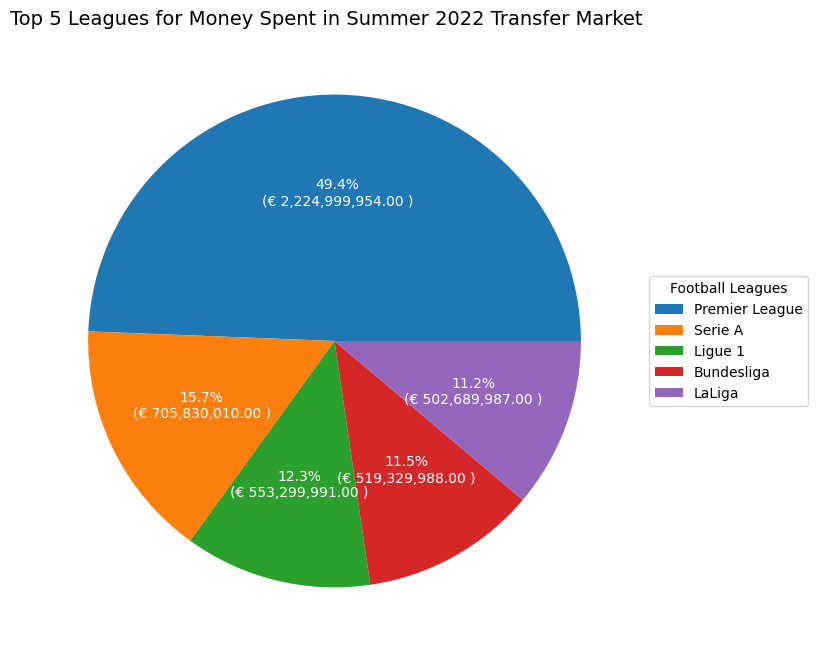

In [28]:
labels = list(top10_spent['league_new_club'])
sizes = top10_spent['cost']

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(aspect="equal"))

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n(€ {:,.2f} )".format(pct, absolute)

wedges, texts, autotexts = ax.pie(sizes, autopct=lambda pct: func(pct, sizes),
                                  textprops=dict(color="w"))

ax.legend(wedges, labels,
          title="Football Leagues",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=10)

ax.set_title("Top 5 Leagues for Money Spent in Summer 2022 Transfer Market", fontsize=14, loc = 'right')

plt.show()

### 3.3 Number of Transfer Activity Day-to-Day During Summer 2022 Transfer Window

In [20]:
activity = df[df['league_new_club'].isin(list(top10_spent['league_new_club']))]
activity.head(10)

,name,position,age,origin_club,league_origin_club,country_origin_club,new_club,league_new_club,country_new_club,player_market_value,cost,date_of_transfer,latitude_to,longitude_to,to,latitude_from,longitude_from,from,week_of_transfer
0,Amine Gouiri,Centre-Forward,22.0,OGC Nice,Ligue 1,France,Stade Rennais FC,Ligue 1,France,42000000,28000000,2022-09-01,46.227638,2.213749,France,46.227638,2.213749,France,35
1,Umar Sadiq,Centre-Forward,25.0,UD Almería,LaLiga,Spain,Real Sociedad,LaLiga,Spain,18000000,20000000,2022-09-01,40.463667,-3.749220,Spain,40.463667,-3.749220,Spain,35
2,Carlos Soler,Central Midfield,25.0,Valencia CF,LaLiga,Spain,Paris Saint-Germain,Ligue 1,France,50000000,18000000,2022-09-01,46.227638,2.213749,France,40.463667,-3.749220,Spain,35
3,Manuel Akanji,Centre-Back,27.0,Borussia Dortmund,Bundesliga,Germany,Manchester City,Premier League,England,30000000,17500000,2022-09-01,52.355518,-1.174320,England,51.165691,10.451526,Germany,35
4,Wout Faes,Centre-Back,24.0,Stade Reims,Ligue 1,France,Leicester City,Premier League,England,10000000,17000000,2022-09-01,52.355518,-1.174320,England,46.227638,2.213749,France,35
5,Leander Dendoncker,Defensive Midfield,27.0,Wolverhampton Wanderers,Premier League,England,Aston Villa,Premier League,England,28000000,15000000,2022-09-01,52.355518,-1.174320,England,52.355518,-1.174320,England,35
6,Gaëtan Laborde,Centre-Forward,28.0,Stade Rennais FC,Ligue 1,France,OGC Nice,Ligue 1,France,18000000,15000000,2022-09-01,46.227638,2.213749,France,46.227638,2.213749,France,35
7,Pierre-Emerick Aubameyang,Centre-Forward,33.0,FC Barcelona,LaLiga,Spain,Chelsea FC,Premier League,England,15000000,12000000,2022-09-01,52.355518,-1.174320,England,40.463667,-3.749220,Spain,35
8,Jörgen Strand Larsen,Centre-Forward,22.0,FC Groningen,Eredivisie,Netherlands,Celta de Vigo,LaLiga,Spain,6000000,11000000,2022-09-01,40.463667,-3.749220,Spain,52.132633,5.291266,Netherlands,35
9,Billy Gilmour,Central Midfield,21.0,Chelsea FC,Premier League,England,Brighton & Hove Albion,Premier League,England,12000000,10400000,2022-09-01,52.355518,-1.174320,England,52.355518,-1.174320,England,35


In [21]:
activity1 = activity.groupby(['league_new_club','date_of_transfer','country_new_club']).agg({'name':'count','cost':'sum'}).reset_index()
activity1.info()
activity1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   league_new_club   258 non-null    object
 1   date_of_transfer  258 non-null    object
 2   country_new_club  258 non-null    object
 3   name              258 non-null    int64 
 4   cost              258 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 10.2+ KB


,league_new_club,date_of_transfer,country_new_club,name,cost
0,Bundesliga,2022-07-01,Austria,36,22300000
1,Bundesliga,2022-07-01,Germany,74,232330000
2,Bundesliga,2022-07-02,Germany,2,7000000
3,Bundesliga,2022-07-04,Germany,1,0
4,Bundesliga,2022-07-05,Austria,1,1000000


In [ ]:
list(top10_spent['league_new_club'])

Text(0.5, 1.0, 'Daily Number of Player Transfer Activity from LaLiga')

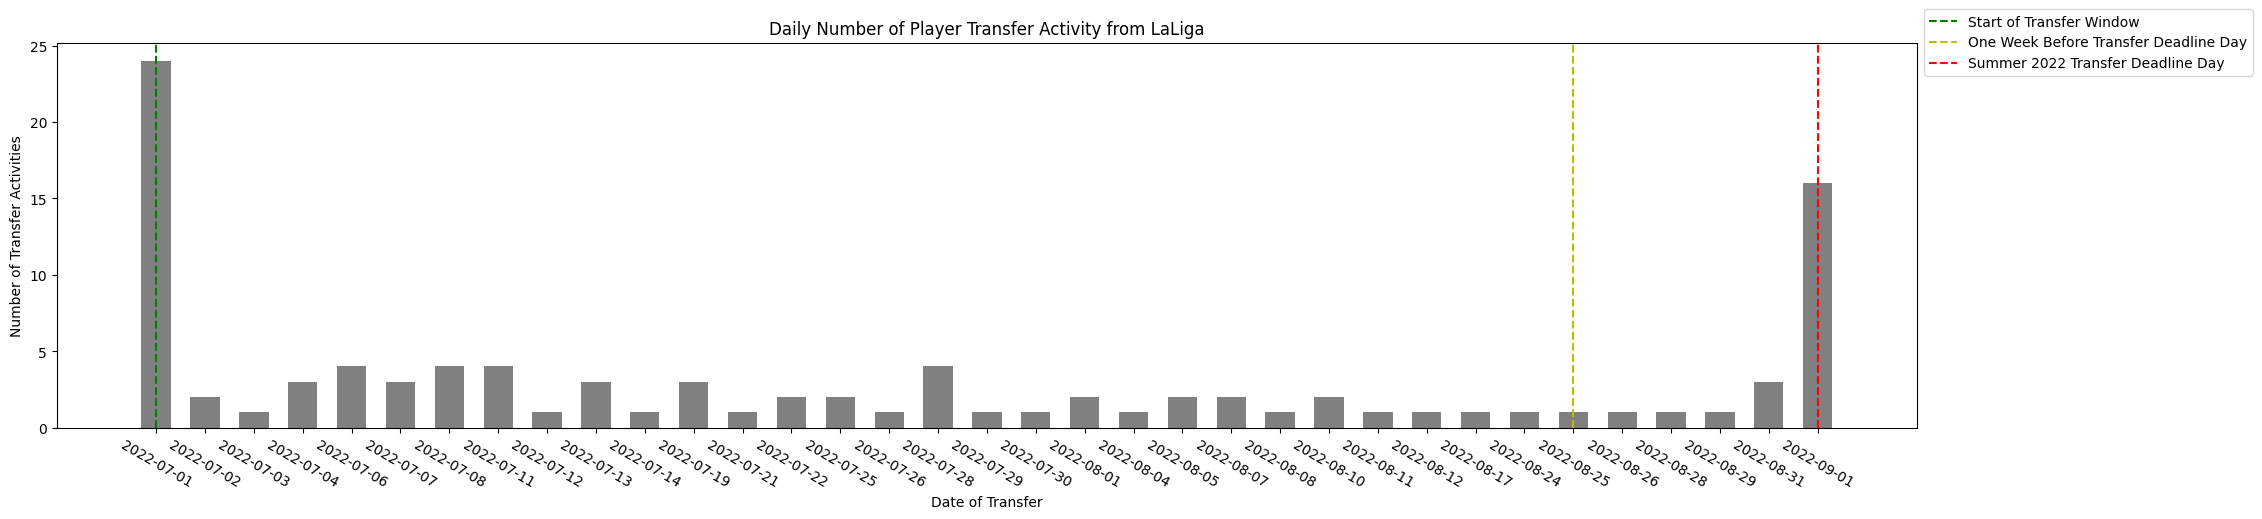

In [23]:
activity2 = activity1[activity1['league_new_club'] == 'LaLiga']

fig=plt.figure(figsize=(24,5))
ax1=plt.subplot(1,1,1)
ax1.bar(activity2['date_of_transfer'],activity2['name'],width=0.6,color='grey')
#Rotate x-axis labels to make them more legible
for xlabel in ax1.get_xticklabels():
    xlabel.set_rotation(-30)

ax1.set_xlabel('Date of Transfer')
ax1.set_ylabel('Number of Transfer Activities')

plt.axvline(x='2022-07-01',ls='--', color='g', label='Start of Transfer Window')
plt.axvline(x='2022-08-25',ls='--', color='y', label='One Week Before Transfer Deadline Day')
plt.axvline(x='2022-09-01',ls='--', color='r', label='Summer 2022 Transfer Deadline Day')
plt.legend(bbox_to_anchor=(1.0, 1), loc=6)

plt.title('Daily Number of Player Transfer Activity from LaLiga', fontsize = 12)